In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import pickle
import seaborn as sns

import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap

In [2]:
import sys  
sys.path.insert(0, '/Users/Daniel/Documents/Research Projects/Cosmic-Filaments/Gama_Galaxies/')

import gama_gals.gama_functs as gf # now call all functions using "gf".'function_name'

In [3]:
# Using outlier treated gama file
f = open('/Users/Daniel/Documents/Research Projects/Cosmic-Filaments/Pickles/gamagals_complete_3point5sigma.pkl', 'rb') #from persistence 4 file
gama = pickle.load(f)

#show all columns
pd.set_option('display.max_columns', None)

In [4]:
gama

,CATAID,RA,DEC,Z,Z_TONRY,logmstar,dellogmstar,GAMA_NAME,NQ,logage,dellogage,logtau,dellogtau,metal,delmetal,extBV,delextBV,logLWage,dellogLWage,gminusi,delgminusi,X,Y,Z.2,d,GroupID,FilID,px,py,pz,fil_d,node_d,Fil_ID,Fil Length
0,6802,174.00600,0.72093,0.05054,0.051814,9.07603,0.131666,GAMAJ113601.43+004315.3,4,9.73361,0.251961,9.79510,0.174241,0.017558,0.009571,0.128447,0.097892,9.13797,0.367253,0.714898,0.047596,NaN,NaN,NaN,NaN,NaN,NaN,-216.625210,22.745292,2.740837,4.996397,15.630060,383.0,9.576572
1,6806,174.02279,0.70594,0.33124,0.332854,10.97920,0.099166,GAMAJ113605.47+004221.3,4,9.73226,0.185493,9.70157,0.228172,0.008544,0.007267,0.157169,0.090216,9.25334,0.261045,0.781605,0.040918,NaN,NaN,NaN,NaN,NaN,NaN,-1224.886159,128.248150,15.175059,29.451601,59.637607,3444.0,15.535263
2,6808,174.10071,0.65891,0.22936,0.230851,10.79160,0.098116,GAMAJ113624.17+003932.1,4,9.84259,0.141759,9.09017,0.463165,0.005238,0.004209,0.103443,0.092987,9.70270,0.195297,1.047030,0.052520,NaN,NaN,NaN,NaN,NaN,NaN,-895.469883,92.526596,10.353321,3.835973,41.224331,4604.0,17.173529
3,6810,174.10908,0.80390,0.32630,0.327908,11.11970,0.096136,GAMAJ113626.18+004814.0,4,9.77507,0.161527,9.44149,0.381685,0.010000,0.009512,0.213611,0.128855,9.47198,0.249714,1.109650,0.049929,NaN,NaN,NaN,NaN,NaN,NaN,-1209.953065,124.842693,17.067738,7.405275,70.020364,6751.0,24.703361
4,6816,174.01896,0.66580,0.07641,0.077715,9.01239,0.146456,GAMAJ113604.55+003956.8,4,9.74954,0.249899,9.76074,0.199806,0.017116,0.012548,0.157250,0.109367,9.18014,0.386884,0.792209,0.088951,NaN,NaN,NaN,NaN,NaN,NaN,-323.199357,33.861492,3.776433,1.535282,21.021750,637.0,9.504916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113150,4316366,213.05437,1.30309,0.39424,0.395438,10.66650,0.103570,GAMAJ141213.04+011811.1,4,9.74387,0.166627,9.58603,0.314890,0.011552,0.009595,0.204443,0.116592,9.35225,0.281883,1.002530,0.066198,NaN,NaN,NaN,NaN,NaN,NaN,-1187.973415,-773.082676,32.241104,1.321570,67.473809,5878.0,66.369997
113151,4319812,217.17037,1.24932,0.36760,0.368687,10.78200,0.114570,GAMAJ142840.88+011457.5,3,9.73837,0.180143,9.57994,0.333225,0.015309,0.012675,0.289038,0.143879,9.34651,0.328285,1.200770,0.082471,NaN,NaN,NaN,NaN,NaN,NaN,-1068.100884,-809.862442,29.232078,1.333843,45.828704,3989.0,39.288667
113152,4321280,218.97938,1.18502,0.25990,0.260865,10.18250,0.140112,GAMAJ143555.04+011106.0,4,9.73788,0.214996,9.63324,0.300932,0.017234,0.012418,0.282272,0.151406,9.28620,0.385645,1.154480,0.115395,NaN,NaN,NaN,NaN,NaN,NaN,-780.131624,-631.273402,20.758872,2.071966,31.328595,5578.0,33.138337
113153,4321789,219.54175,1.20398,0.29884,0.299822,10.41060,0.131773,GAMAJ143810.02+011214.3,4,9.73840,0.200243,9.68338,0.258316,0.011334,0.010206,0.295945,0.123099,9.27067,0.348444,1.093130,0.099525,NaN,NaN,NaN,NaN,NaN,NaN,-871.610163,-719.567317,23.754061,3.001869,22.936076,2988.0,13.665752


In [5]:
np.unique(np.array(gama['FilID']))

array([150001., 150002., 150003., 150004., 150005., 150006., 150007.,
       150008., 150009., 150010., 150011., 150012., 150013., 150014.,
       150015., 150016., 150017., 150018., 150019., 150020., 150021.,
       150022., 150023., 150024., 150025., 150026., 150027., 150028.,
       150029., 150030., 150031., 150032., 150033., 150034., 150035.,
       150036., 150037., 150038., 150039., 150040., 150041., 150042.,
       150043., 150044., 150045., 150046., 150047., 150048., 150049.,
       150050., 150051., 150052., 150053., 150054., 150055., 150056.,
       150057., 150058., 150059., 150060., 150061., 150062., 150063.,
       150064., 150065., 150066., 150067., 150068., 150069., 150070.,
       150071., 150072., 150073., 150074., 150075., 150076., 150077.,
       150078., 150079., 150080., 150081., 150082., 150083., 150084.,
       150085., 150086., 150087., 150088., 150089., 150090., 150091.,
       150092., 150093., 150094., 150095., 150096., 150097., 150098.,
       150099., 1501

In [6]:
np.sum(np.isnan(gama['FilID'])) # come back to this -- later

98643

In [7]:
def scatterplot(x, y, param_name):
    plt.scatter(x, y, alpha = 0.2, s = 2, c='darkslategray')
    plt.axhline(color="black") 
    plt.title(f"$\Delta$ {param_name} vs. mass")
    plt.xlabel("mass")
    plt.ylabel(f"$\Delta$ {param_name} ")

In [8]:
x = np.array(gama['logmstar']) # x stays the same to decouple mass
# logage
param = 'logage'
y = np.array(gama[param])

del_age, y_exp, res, X, dmask = gf.mass_decoupler_masked(x, y, 40) #make sure delta_param is uniquely saved
# trim original gama dataframe 
# this makes sure gama is trimmed by mask so that in next iteration we are working with reduced dataframe
gama = gama[dmask]
# add new array to gama 
gama['del_age'] = del_age

/var/folders/nd/klv0c43973gc4llkjgc9276m0000gp/T/ipykernel_42574/3049031421.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gama['del_age'] = del_age


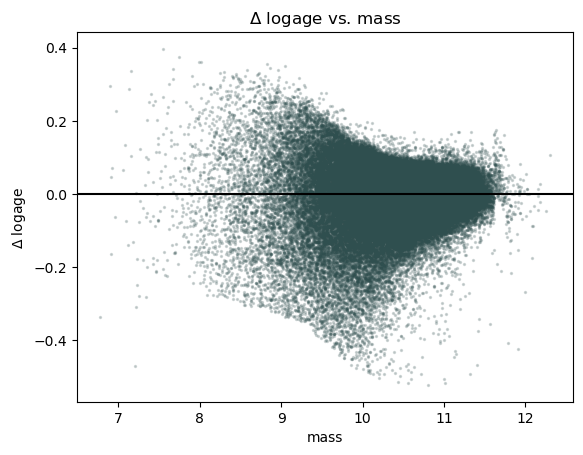

In [9]:
scatterplot(X, del_age, param)

In [10]:
# metal
param = 'metal'
x = np.array(gama['logmstar']) 
y = np.array(gama[param])

del_metal, y_exp, res, X, dmask = gf.mass_decoupler_masked(x, y, 40)
# trim original gama dataframe 
gama = gama[dmask]
# add new array to gama 
gama['del_metal'] = del_metal

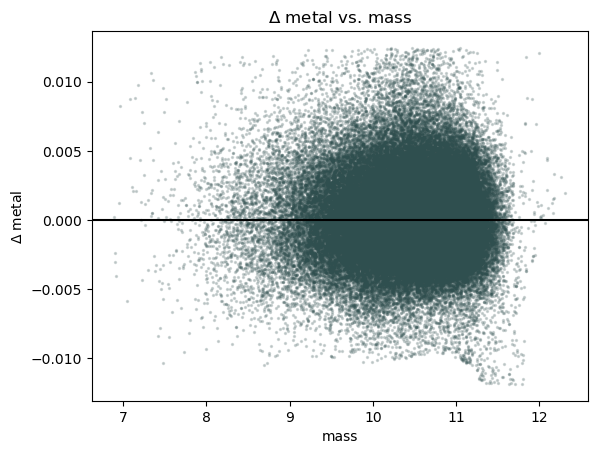

In [11]:
scatterplot(X, del_metal, param)

In [12]:
# TAU 
param = 'logtau'
x = np.array(gama['logmstar']) 
y = np.array(gama[param])

del_tau, y_exp, res, X, dmask = gf.mass_decoupler_masked(x, y, 40)
# trim original gama dataframe 
gama = gama[dmask]
# add new array to gama 
gama['del_tau'] = del_tau

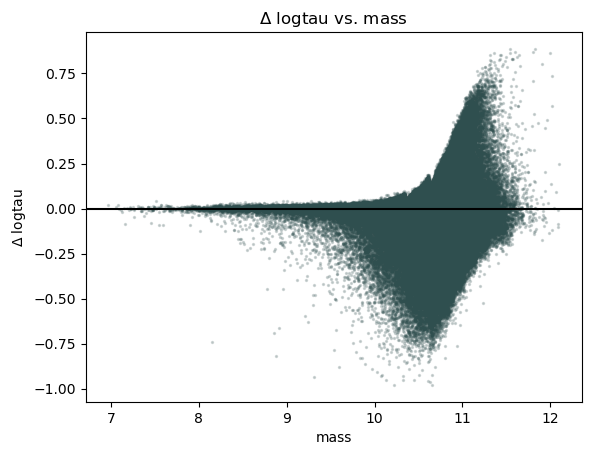

In [13]:
scatterplot(X, del_tau, param)

In [14]:
# extBV 
param = 'extBV'
x = np.array(gama['logmstar']) 
y = np.array(gama[param])

del_extBV, y_exp, res, X, dmask = gf.mass_decoupler_masked(x, y, 40)
# trim original gama dataframe 
gama = gama[dmask]
# add new array to gama 
gama['del_extBV'] = del_extBV

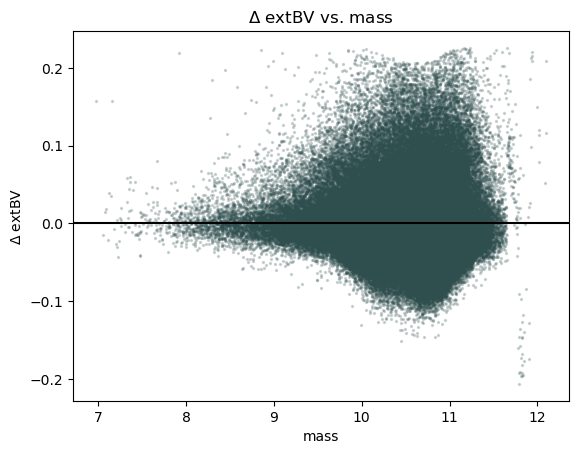

In [15]:
scatterplot(X, del_extBV, param)

In [16]:
# logLWage 
param = 'logLWage'
x = np.array(gama['logmstar']) 
y = np.array(gama[param])

del_loglwage, y_exp, res, X, dmask = gf.mass_decoupler_masked(x, y, 40)
# trim original gama dataframe 
gama = gama[dmask]
# add new array to gama 
gama['del_lolglwage'] = del_loglwage

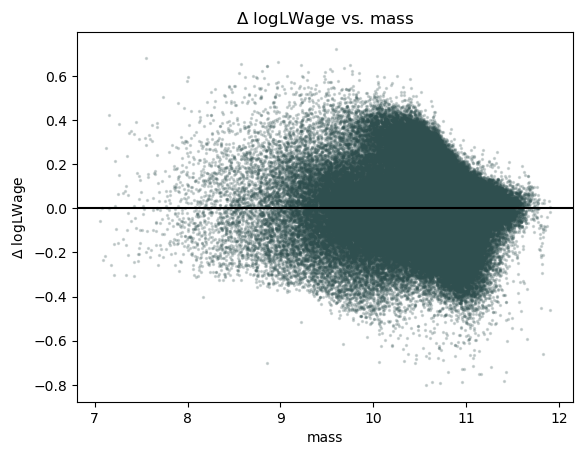

In [17]:
scatterplot(X, del_loglwage, param)

In [18]:
# logLWage 
param = 'gminusi'
x = np.array(gama['logmstar']) 
y = np.array(gama[param])

del_gminusi, y_exp, res, X, dmask = gf.mass_decoupler_masked(x, y, 40)
# trim original gama dataframe 
gama = gama[dmask]
# add new array to gama 
gama['del_gminusi'] = del_gminusi

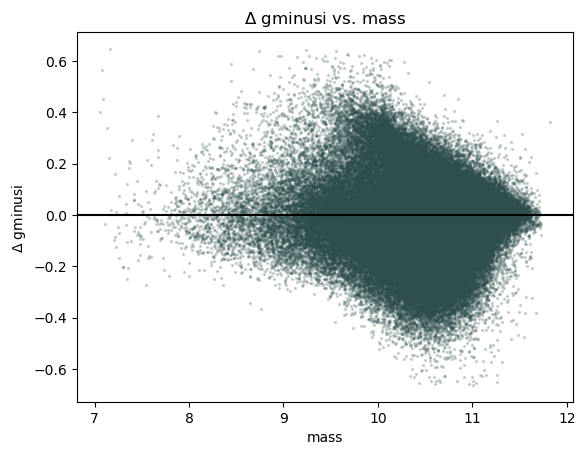

In [19]:
scatterplot(X, del_gminusi, param)

In [20]:
### NEW DONE REFINED GAMA DATAFRAME
gama

,CATAID,RA,DEC,Z,Z_TONRY,logmstar,dellogmstar,GAMA_NAME,NQ,logage,dellogage,logtau,dellogtau,metal,delmetal,extBV,delextBV,logLWage,dellogLWage,gminusi,delgminusi,X,Y,Z.2,d,GroupID,FilID,px,py,pz,fil_d,node_d,Fil_ID,Fil Length,del_age,del_metal,del_tau,del_extBV,del_lolglwage,del_gminusi
0,6802,174.00600,0.72093,0.05054,0.051814,9.07603,0.131666,GAMAJ113601.43+004315.3,4,9.73361,0.251961,9.79510,0.174241,0.017558,0.009571,0.128447,0.097892,9.13797,0.367253,0.714898,0.047596,NaN,NaN,NaN,NaN,NaN,NaN,-216.625210,22.745292,2.740837,4.996397,15.630060,383.0,9.576572,0.135861,0.007117,0.025198,0.037848,0.127763,0.199761
1,6806,174.02279,0.70594,0.33124,0.332854,10.97920,0.099166,GAMAJ113605.47+004221.3,4,9.73226,0.185493,9.70157,0.228172,0.008544,0.007267,0.157169,0.090216,9.25334,0.261045,0.781605,0.040918,NaN,NaN,NaN,NaN,NaN,NaN,-1224.886159,128.248150,15.175059,29.451601,59.637607,3444.0,15.535263,-0.061107,-0.001711,0.437254,0.011651,-0.316116,-0.308329
2,6808,174.10071,0.65891,0.22936,0.230851,10.79160,0.098116,GAMAJ113624.17+003932.1,4,9.84259,0.141759,9.09017,0.463165,0.005238,0.004209,0.103443,0.092987,9.70270,0.195297,1.047030,0.052520,NaN,NaN,NaN,NaN,NaN,NaN,-895.469883,92.526596,10.353321,3.835973,41.224331,4604.0,17.173529,0.052287,-0.004789,-0.394351,-0.062903,0.220631,-0.006506
3,6810,174.10908,0.80390,0.32630,0.327908,11.11970,0.096136,GAMAJ113626.18+004814.0,4,9.77507,0.161527,9.44149,0.381685,0.010000,0.009512,0.213611,0.128855,9.47198,0.249714,1.109650,0.049929,NaN,NaN,NaN,NaN,NaN,NaN,-1209.953065,124.842693,17.067738,7.405275,70.020364,6751.0,24.703361,-0.018569,-0.000762,0.322157,0.087984,-0.142727,-0.009405
4,6816,174.01896,0.66580,0.07641,0.077715,9.01239,0.146456,GAMAJ113604.55+003956.8,4,9.74954,0.249899,9.76074,0.199806,0.017116,0.012548,0.157250,0.109367,9.18014,0.386884,0.792209,0.088951,NaN,NaN,NaN,NaN,NaN,NaN,-323.199357,33.861492,3.776433,1.535282,21.021750,637.0,9.504916,0.156676,0.006489,-0.008842,0.067625,0.174831,0.274991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113150,4316366,213.05437,1.30309,0.39424,0.395438,10.66650,0.103570,GAMAJ141213.04+011811.1,4,9.74387,0.166627,9.58603,0.314890,0.011552,0.009595,0.204443,0.116592,9.35225,0.281883,1.002530,0.066198,NaN,NaN,NaN,NaN,NaN,NaN,-1187.973415,-773.082676,32.241104,1.321570,67.473809,5878.0,66.369997,-0.046750,0.001427,-0.036499,0.032649,-0.048886,-0.017425
113151,4319812,217.17037,1.24932,0.36760,0.368687,10.78200,0.114570,GAMAJ142840.88+011457.5,3,9.73837,0.180143,9.57994,0.333225,0.015309,0.012675,0.289038,0.143879,9.34651,0.328285,1.200770,0.082471,NaN,NaN,NaN,NaN,NaN,NaN,-1068.100884,-809.862442,29.232078,1.333843,45.828704,3989.0,39.288667,-0.051808,0.005296,0.084530,0.121588,-0.131318,0.149076
113152,4321280,218.97938,1.18502,0.25990,0.260865,10.18250,0.140112,GAMAJ143555.04+011106.0,4,9.73788,0.214996,9.63324,0.300932,0.017234,0.012418,0.282272,0.151406,9.28620,0.385645,1.154480,0.115395,NaN,NaN,NaN,NaN,NaN,NaN,-780.131624,-631.273402,20.758872,2.071966,31.328595,5578.0,33.138337,-0.025282,0.006663,-0.106364,0.128678,0.041830,0.326546
113153,4321789,219.54175,1.20398,0.29884,0.299822,10.41060,0.131773,GAMAJ143810.02+011214.3,4,9.73840,0.200243,9.68338,0.258316,0.011334,0.010206,0.295945,0.123099,9.27067,0.348444,1.093130,0.099525,NaN,NaN,NaN,NaN,NaN,NaN,-871.610163,-719.567317,23.754061,3.001869,22.936076,2988.0,13.665752,-0.041205,0.000908,-0.032833,0.132132,-0.027733,0.161765


In [21]:
np.unique(gama['FilID']).shape

(237,)

FIRST NEED TO ADD FILAMENT LENGTHS THAT CORRESPOND TO IDS: 

- this is found in Gama-filament-lengths.ipynb
- done !!

#### Save **FINALIZED** catalog of filaments and galaxies

In [23]:
# pickle save -- not quite yet  
#with open('/Users/Daniel/Documents/Research Projects/Cosmic Filaments/Pickles/final_catalog_gama_v1.pkl', 'wb') as f: 
#    pickle.dump(gama, f)